<a href="https://colab.research.google.com/github/bmaged23/EDA/blob/main/EDA_EDA_and_ML_for_bank_marketing_dataset_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d henriqueyamahata/bank-marketing

Dataset URL: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing
License(s): other
bank-marketing.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile("/content/bank-marketing.zip",'r') as file:
  file.extractall("/content/bank-marketing")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url="/content/bank-marketing/bank-additional-full.csv"
df=pd.read_csv(url,sep=";")
new_df=df
new_df=new_df.replace("unknown",pd.NA)
new_df=new_df.drop_duplicates()
new_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,<NA>,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             40846 non-null  object 
 2   marital         41096 non-null  object 
 3   education       39446 non-null  object 
 4   default         32580 non-null  object 
 5   housing         40186 non-null  object 
 6   loan            40186 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [ ]:
new_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
new_df["job"]=new_df["job"].astype("category")
new_df["marital"]=new_df["marital"].astype("category")
new_df["education"]=new_df["education"].astype("category")
new_df["default"]=new_df["default"].astype("category")
new_df["housing"]=new_df["housing"].astype("category")
new_df["loan"]=new_df["loan"].astype("category")
new_df["contact"]=new_df["contact"].astype("category")
new_df["month"]=new_df["month"].astype("category")
new_df["day_of_week"]=new_df["day_of_week"].astype("category")
new_df["poutcome"]=new_df["poutcome"].astype("category")
new_df["y"]=new_df["y"].astype("category")
new_df=new_df.rename(columns={"y":"Class"})

new_df=new_df.dropna()
new_df["job"] = new_df["job"].fillna(new_df["job"].mode()[0])
new_df["marital"] = new_df["marital"].fillna(new_df["marital"].mode()[0])
new_df["education"] = new_df["education"].fillna(new_df["education"].mode()[0])
new_df["default"] = new_df["default"].fillna(new_df["default"].mode()[0])
new_df["housing"] = new_df["housing"].fillna(new_df["housing"].mode()[0])
new_df["loan"] = new_df["loan"].fillna(new_df["loan"].mode()[0])



new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             41176 non-null  category
 2   marital         41176 non-null  category
 3   education       41176 non-null  category
 4   default         41176 non-null  category
 5   housing         41176 non-null  category
 6   loan            41176 non-null  category
 7   contact         41176 non-null  category
 8   month           41176 non-null  category
 9   day_of_week     41176 non-null  category
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  category
 15  emp.var.rate    41176 non-null  float64 
 16  cons.price.idx  41176 non-null  float64 
 17  cons.conf.idx   4

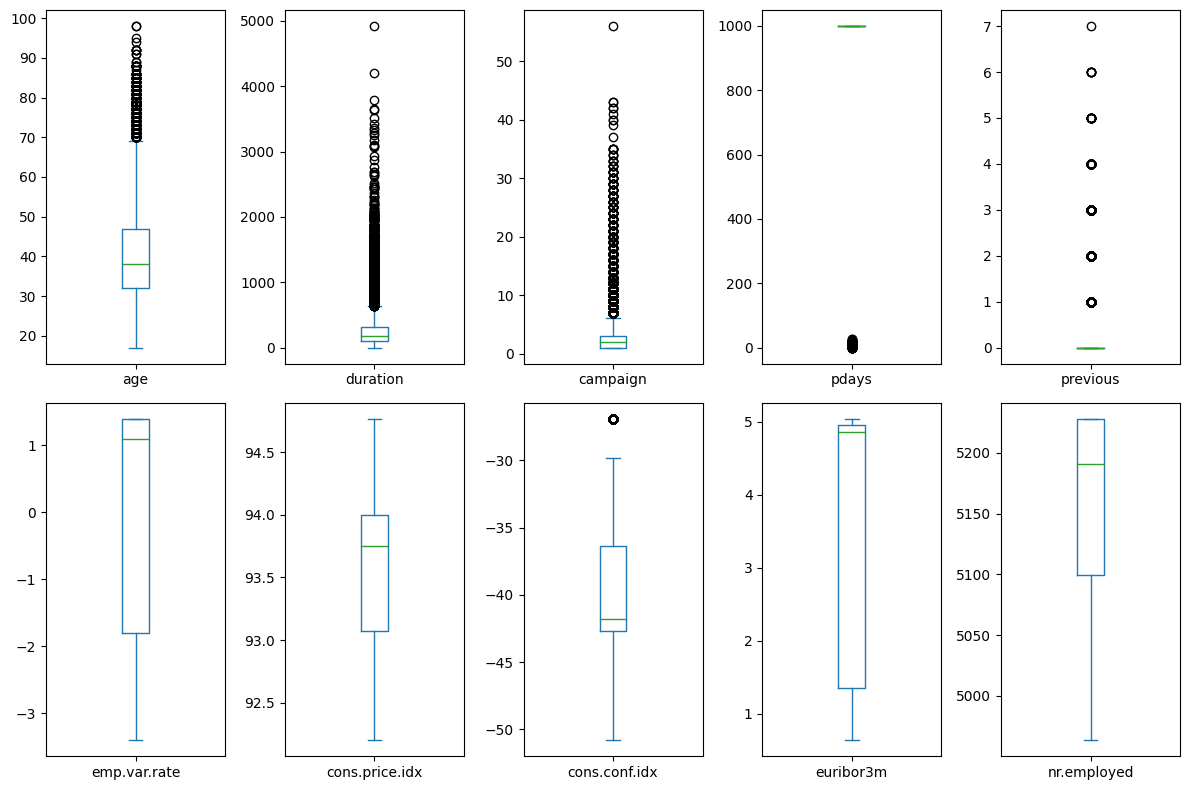

In [ ]:
new_df.plot(kind='box', subplots=True, layout=(2, -1), figsize=(12, 8))
plt.tight_layout()
plt.show()

In [ ]:
col=list(new_df.columns)
for cl in col:
  print(cl)
  print(new_df[cl].unique())

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job
['housemaid', 'services', 'admin.', 'blue-collar', 'technician', ..., 'management', 'unemployed', 'self-employed', 'entrepreneur', 'student']
Length: 11
Categories (11, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'services',
                          'student', 'technician', 'unemployed']
marital
['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']
education
['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'university.degree', 'illiterate']
Categories (7, object): ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
                         'professional.course', 'university.degree']
default
['no', 'yes']
Categories (2, object): ['no', 'yes']

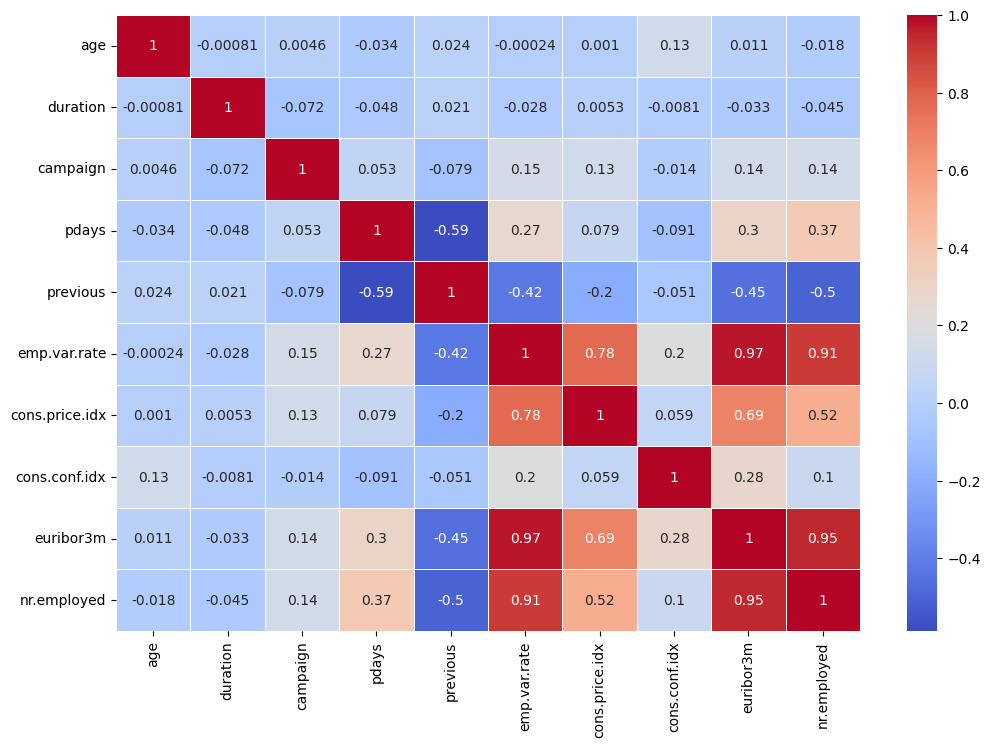

In [ ]:
import seaborn as sns
num_df=new_df.select_dtypes(include=["number"])
correlation=num_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

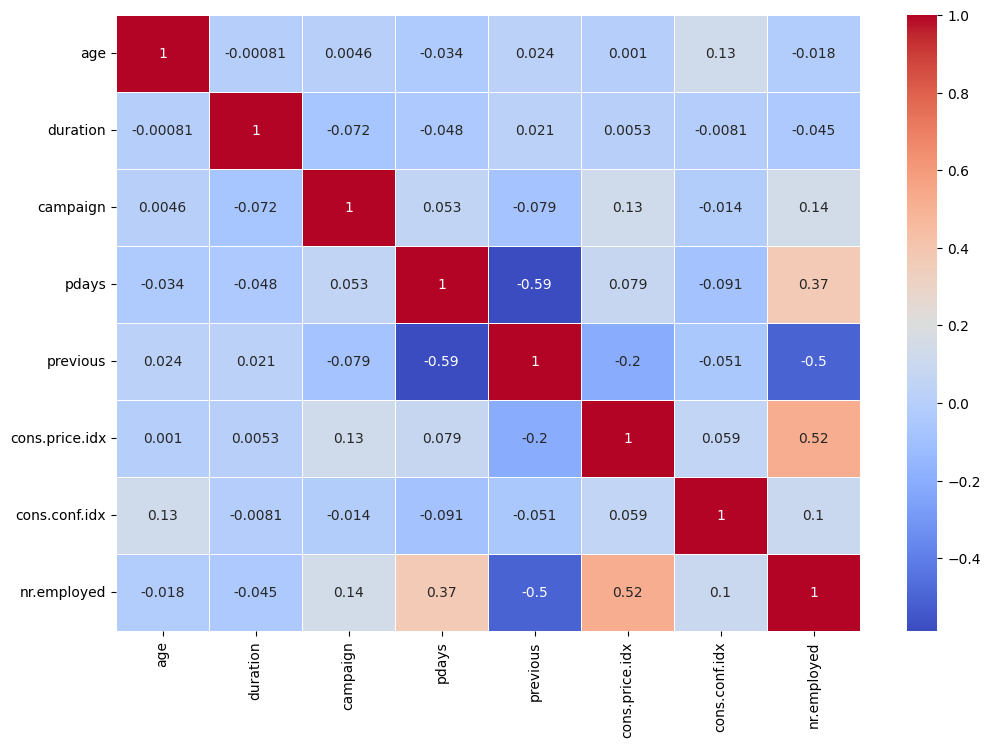

In [ ]:
new_df=new_df.drop(columns=["emp.var.rate","euribor3m","default"])
num_df=new_df.select_dtypes(include=["number"])
correlation=num_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming new_df is your DataFrame
col = list(new_df.columns)

# Separate features and target variable
Y = new_df[col[-1]]  # Target variable (last column)
X = new_df[col[:-1]]  # Features (all columns except the last one)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Convert scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)


# Display the processed features
print(X_scaled_df.head())



        age  duration  campaign     pdays  previous  cons.price.idx  \
0  1.533143  0.010352 -0.565963  0.195443 -0.349551        0.722628   
1  1.629107 -0.421577 -0.565963  0.195443 -0.349551        0.722628   
2 -0.290177 -0.124626 -0.565963  0.195443 -0.349551        0.722628   
3 -0.002284 -0.413864 -0.565963  0.195443 -0.349551        0.722628   
4  1.533143  0.187751 -0.565963  0.195443 -0.349551        0.722628   

   cons.conf.idx  nr.employed  job_admin.  job_blue-collar  ...  month_oct  \
0       0.886568     0.331695   -0.594367        -0.538381  ...  -0.133123   
1       0.886568     0.331695   -0.594367        -0.538381  ...  -0.133123   
2       0.886568     0.331695   -0.594367        -0.538381  ...  -0.133123   
3       0.886568     0.331695    1.682463        -0.538381  ...  -0.133123   
4       0.886568     0.331695   -0.594367        -0.538381  ...  -0.133123   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0  -0.118479         -0.48442        

In [ ]:
X

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,5191.0
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,5191.0
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,5191.0
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,5191.0
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,94.767,-50.8,4963.6
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,94.767,-50.8,4963.6
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,94.767,-50.8,4963.6
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,94.767,-50.8,4963.6


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled_df,Y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
model=SVC(class_weight={"no":5,"yes":200})
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
print(f"train acc={accuracy_score(y_train,y_pred_train)}")

y_pred_test=model.predict(x_test)
print(f"val acc={accuracy_score(y_test,y_pred_test)}")
print(classification_report(y_test,y_pred_test))

train acc=0.9282027929568913
val acc=0.8646187469645459
              precision    recall  f1-score   support

          no       0.95      0.89      0.92      7265
         yes       0.45      0.68      0.54       971

    accuracy                           0.86      8236
   macro avg       0.70      0.79      0.73      8236
weighted avg       0.90      0.86      0.88      8236



Class
no     36537
yes     4639
Name: count, dtype: int64


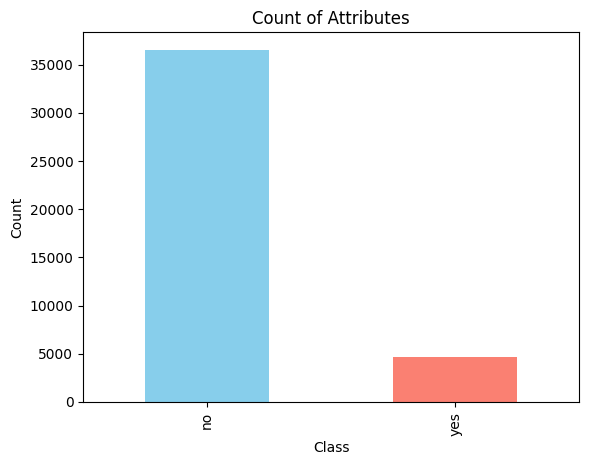

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

bar_df = new_df['Class'].value_counts()
print(bar_df)
bar_df.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Attributes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Fit the pipeline on the training data
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svm', SVC(kernel='linear'))  # Support Vector Machine model
])pipeline.fit(x_train, y_train)

# Predict on the training data
y_train_pred = pipeline.predict(x_train)

# Compute training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_scaled_df, y, cv=5, scoring='accuracy')

# Print cross-validation and training accuracy
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.2f}")
print(f"Training Accuracy: {train_accuracy:.2f}")

KeyboardInterrupt: 